# **1. Loading and Preprocessing (1 marks)**




In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert the dataset into a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Drop the species column (target) since this is a clustering problem
# Note: The species column is not part of the features, so we don't need to drop it
# The iris.data already contains only the features (sepal length, sepal width, petal length, petal width)

# Display the first few rows of the DataFrame
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


# **2.Clustering Algorithm Implementation (8 marks)**

# **A) KMeans Clustering (4 marks)**

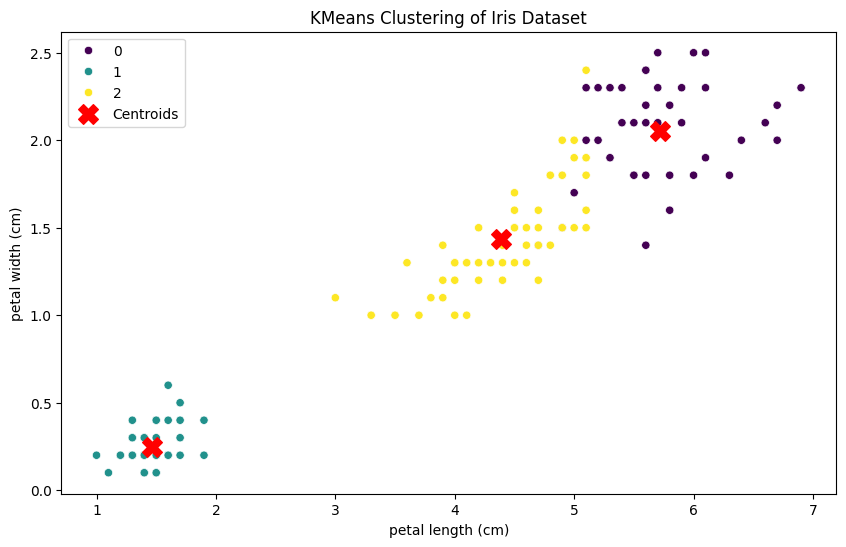

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(iris_df)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',
                hue=clusters, data=iris_df, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
            s=200, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering of Iris Dataset')
plt.legend()
plt.show()

# **B) Hierarchical Clustering (4 marks)**

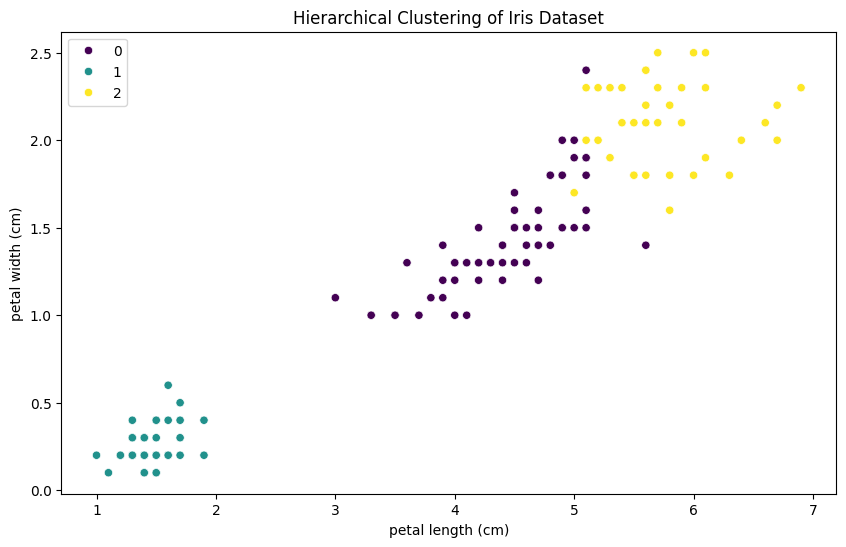

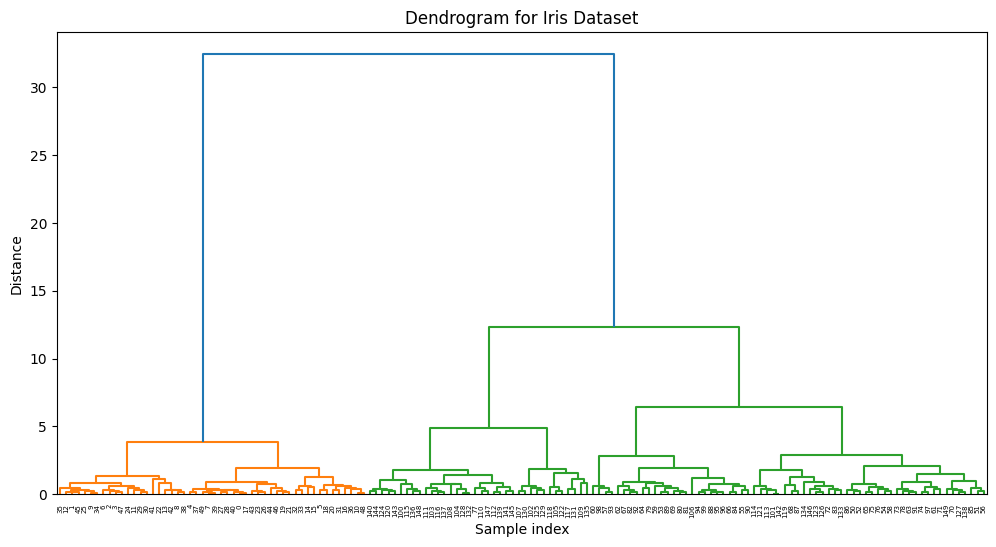

In [7]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
h_clusters = hierarchical.fit_predict(iris_df)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',
                hue=h_clusters, data=iris_df, palette='viridis')
plt.title('Hierarchical Clustering of Iris Dataset')
plt.legend()
plt.show()

# Dendrogram visualization
plt.figure(figsize=(12, 6))
dendrogram(linkage(iris_df, method='ward'))
plt.title('Dendrogram for Iris Dataset')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()